In [53]:
#Cargar librerias para el EDA
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, set_option
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab
import scipy
from math import sqrt


#Estimadores
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#Modelos de metricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#Validacion Cruzada
from sklearn.model_selection import train_test_split

#Prepprocesamiento
from sklearn import preprocessing
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler 

#Caracterizticas
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE



#Cargar DataSet
clientesMorosos = pd.read_csv('DataCreditOne.csv', header = 1 )

#Limpieza de Datos 
#Verificar adata faltante
clientesMorosos.isnull().sum()

#Con esta verificacion se recorre todo el data set y se puede determinar que la cantidad de datos 
#nulos por columna en el data set es de cero

#Preprocesamiento
transformer = FunctionTransformer(np.log1p, validate=True)
transformer.transform(clientesMorosos)




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:179: RuntimeWarning: divide by zero encountered in log1p
  return func(X, **(kw_args if kw_args else {}))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:179: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


array([[ 0.69314718,  9.90353755,  1.09861229, ...,  0.        ,
         0.        ,  0.69314718],
       [ 1.09861229, 11.69525536,  1.09861229, ...,  0.        ,
         7.60140233,  0.69314718],
       [ 1.38629436, 11.40757606,  1.09861229, ...,  6.90875478,
         8.51739317,  0.        ],
       ...,
       [10.30891933, 10.30898599,  0.69314718, ...,  7.60140233,
         8.03947992,  0.69314718],
       [10.30895266, 11.28979441,  0.69314718, ..., 10.8773866 ,
         7.49831587,  0.69314718],
       [10.30898599, 10.81979828,  0.69314718, ...,  6.90875478,
         6.90875478,  0.69314718]])

In [54]:
#Descripcion de procesos y estadisticas
#Exploracion y descripcion de dataset
clientesMorosos.info()
#Como se puede observar este data set cuenta con 30 mil registros y cada uno de estoses de tipo int-64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [55]:
# Verificacion de los primeros 10 registros
clientesMorososFR = clientesMorosos.iloc[:,1:]
clientesMorososFR.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [56]:
#Explorcion de caracteristicas del data set
clientesMorososEC = clientesMorosos.iloc[:,1:]
clientesMorososEC.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [57]:
#Como se puede observar mediante la exploración de caracteristicas del data set podemos visualizar diferentes tipos caracteristicas que
#van desde el limite de balance minimo y máximo hasta la cantidad total de registros presentes en el data set, esta información es de 
#mucha importancia ya que nos permite obtener valores especificos importantes para la comprensión de la información

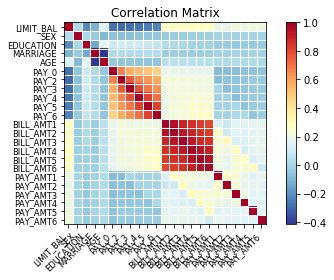

In [58]:
#Correlaciones entre atributos del data set
#Matriz de correlación
ClientesMorososPPC = clientesMorosos.iloc[:,1:]
MatrizCR = ClientesMorososPPC.set_index('default_payment_next_month').corr(method='pearson')

# Mostrar Grafico de Matriz

sm.graphics.plot_corr(MatrizCR, xnames=list(MatrizCR.columns))
plt.show()

In [59]:
#En la matriz de correlacionb anterior podemos observar la fuerte correlacion de todos los "BillATM" 
#con el atributo de "default_payment_next_month" de igual manera se puede apreciar que todos los atributos de "Pay" 
#tienen una correlacion fuerte de igual forma con "default_payment_next_month"

In [60]:
#Visualizacion de correlacion de variables
ClientesMorososVV = clientesMorosos.iloc[:,1:]
skew = ClientesMorososVV.skew()
print(skew)

LIMIT_BAL                      0.992867
SEX                           -0.424183
EDUCATION                      0.970972
MARRIAGE                      -0.018742
AGE                            0.732246
PAY_0                          0.731975
PAY_2                          0.790565
PAY_3                          0.840682
PAY_4                          0.999629
PAY_5                          1.008197
PAY_6                          0.948029
BILL_AMT1                      2.663861
BILL_AMT2                      2.705221
BILL_AMT3                      3.087830
BILL_AMT4                      2.821965
BILL_AMT5                      2.876380
BILL_AMT6                      2.846645
PAY_AMT1                      14.668364
PAY_AMT2                      30.453817
PAY_AMT3                      17.216635
PAY_AMT4                      12.904985
PAY_AMT5                      11.127417
PAY_AMT6                      10.640727
default_payment_next_month     1.343504
dtype: float64


In [61]:
#En los valores mostrados se puede denotar que lo que aprecimos en la matriz de relación, donde todas las variables de PAY
#y todas las variables BILL_ATM muestra n los valores con mayor correlacion con "default_payment_next_month"

In [62]:
#Agrupaciones
#Con la data presente en el data set podemos realizar diferentes tipos de analisis, y una forma eficiente y util para poder
#entender de manera mas facil esta data es aplicando agrupaciones como la siguiente:
clientesMorosos.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

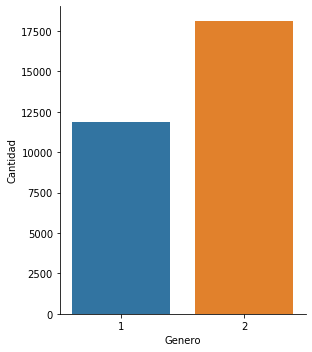

In [63]:
#Tomando en cuenta que para nuestra columna de sexo el valor 1 representa a los Hombres y el 2 a las mujeres, eventualmente podriamos
#graficar estos valores para mostrarlos de morma mas visual


Grafico = sns.catplot('SEX', data=clientesMorosos, kind='count', aspect=.85)
Grafico.set_xlabels('Genero')
Grafico.set_ylabels('Cantidad')

In [64]:
#Agrupacion combinada
#Al igual que vimos en el ejemplo anterion la agrupacion de datos podemos realizarla con multiples columnas, permitiendonos
#asi poder realizar calculos o mostrar informacion relacionada de manera mas sencilla, veamos el siguiente ejemplo:

# Estado Civil y Genero
clientesMorosos.groupby(['MARRIAGE','SEX'])['SEX'].count()



MARRIAGE  SEX
0         1        14
          2        40
1         1      5190
          2      8469
2         1      6553
          2      9411
3         1       131
          2       192
Name: SEX, dtype: int64

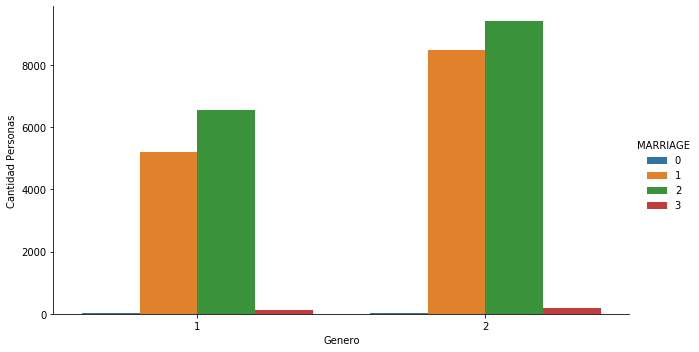

In [65]:
# Agrupacion mediante seaborn Graficacion Multiple
GM = sns.catplot('SEX', data=clientesMorosos, hue='MARRIAGE', kind='count', aspect=1.75)
GM.set_xlabels('Genero')
GM.set_ylabels('Cantidad Personas')

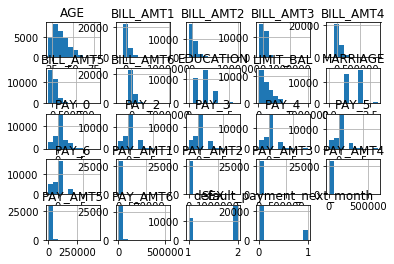

In [66]:
#VISUALIZACION DE DATOS
#Para la visualizacion de la data es importante tener en cuenta que existen diferentes opciones que pueden utilizarse para 
#expresarla mediante un grafico, los siguientes son algunos de los cuales permiten visualizar el data set de diferentes maneras

#Histogramas
GH = clientesMorosos.iloc[:,1:]
GH.hist()
plt.show()

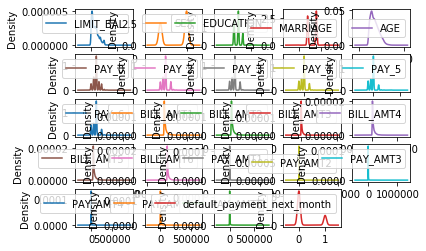

In [67]:
# Grafico de Densidad
GD = clientesMorosos.iloc[:,1:]
GD.plot(kind='density', subplots=True, layout=(5,5), sharex=False)
plt.show()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64


Text(0.5, 1.0, 'Distribución de Edades')

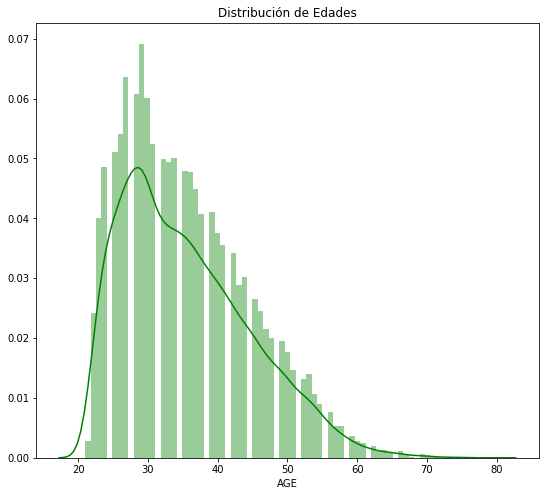

In [68]:
#Exploracion de variables separadas
#Asi como hemos podido ver que se puede realizar un analisis completo de la informacion del data set de igual forma podemos
#realizar analisis de columnas o variables especificas, observemos el ejemplo siguiente:

print(clientesMorosos.AGE.describe())
plt.figure(figsize=(9, 8))
age_dist = sns.distplot(clientesMorosos.AGE, color='g', bins=75, hist_kws={'alpha': 0.4});
age_dist.set_title("Distribución de Edades")

In [69]:
#Construccion de Modelos

#Caracteristicas RFE
feactures = clientesMorosos.iloc[:, 12:23]

#Variable Dependiente
depVar = clientesMorosos ['PAY_AMT6']

# Conjunto de entrenamiento (Espacio de funciones : X Entrenamiento)
TrainSet_X = (feactures [: 1000]) 
TrainSet_X.head()

# Conjunto de entrenamiento variable dependiente (y Entrenamiento) 
TraintSet_Y = depVar [: 1000] 
TraintSet_Y_Count = len (TraintSet_Y.index) 

#Conjunto de prueba X
TestSet_X = feactures[-100:]
TestSet_X_Count = len(TestSet_X.index)

#Ground Truth (y_test) 
TestSet_Y  = depVar [-100:]
TestSet_Y_Count = len (TestSet_Y.index) 

#Ejecucion Validacion Cruzada
TrainSet_X, TestSet_X, TraintSet_Y, TestSet_Y = train_test_split (TrainSet_X, TraintSet_Y)

#PROBAR QUE LA DIVISION SE REALIZO SEGUN LO NECESARIO
TrainSet_X.shape, TestSet_X.shape

#Creacion de Modelos
modelSVR = SVR () 
modelRF = RandomForestRegressor () 
modelLR = LinearRegression ()


In [70]:
#Ajuste y puntuación del modelo de RFA
modelRF.fit (TrainSet_X, TraintSet_Y)
print(cross_val_score (modelRF, TrainSet_X, TraintSet_Y))
modelRF.score (TrainSet_X, TraintSet_Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[ 0.00378045  0.22611519 -1.05599937]


0.7694207132272258

In [71]:
#Soporte de ajuste y puntuación del modelo de regresión vectorial
modelSVR.fit (TrainSet_X, TraintSet_Y)
print(cross_val_score (modelSVR, TrainSet_X, TraintSet_Y))
modelSVR.score (TrainSet_X, TraintSet_Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[-0.08624045 -0.05201163 -0.08203388]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.059376770907907606

In [72]:
#Ajuste y puntuación del modelo de regresión lineal
modelLR.fit (TrainSet_X, TraintSet_Y)
print(cross_val_score (modelLR, TrainSet_X, TraintSet_Y))     
modelLR.score (TrainSet_X, TraintSet_Y)

[-0.02290176  0.15126075  0.08874945]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.20329919274790564

In [73]:
#Generar RMSE
predicciones = modelRF.predict (TrainSet_X)
rmse = sqrt (mean_squared_error (TraintSet_Y, predicciones))
predRsquared = r2_score (TraintSet_Y, predicciones)
print ('R Squared:', predRsquared) 
print ('RMSE:', rmse)

R Squared: 0.7694207132272258
RMSE: 6137.674476279276
